In [30]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import plotting as air_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [31]:
df = pd.read_csv("Data/data_final.csv", index_col=0)

In [32]:
df['bathroom']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14318    1.0
14319    1.0
14320    1.0
14321    1.0
14322    1.0
Name: bathroom, Length: 14323, dtype: float64

In [33]:
# count all points that are not NaN
total = df.shape[0] * df.shape[1]
# count all points that are not NaN and not 0
non_zero = df[df != np.nan].count().sum()
non_zero

350278

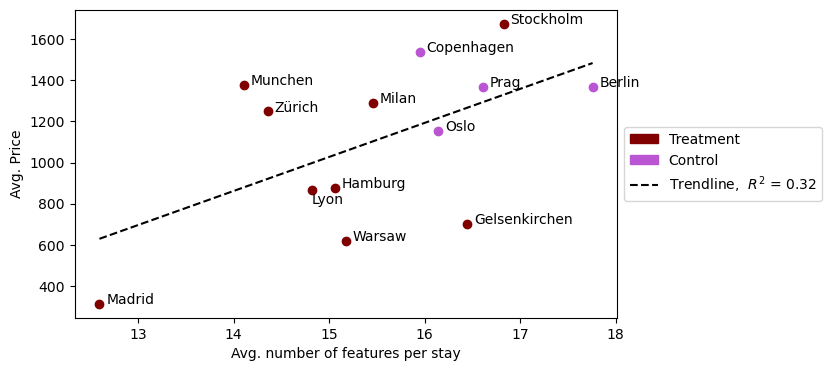

In [34]:
df2 = df.copy()
df2.fillna(0, inplace=True)
# drop amsterdamn from city
df2.drop(df2[df2['city'] == 'Amsterdam'].index, inplace=True)

treats = list(df2.groupby('city')['treat'].mean().astype(int))

df3 = df2.groupby('city')['price'].mean()

df_treat = df2.groupby('city')['treat']

# remove last 5 columns
df2.drop(df2.columns[-6:], axis=1, inplace=True)
df2.drop(df2.columns[1:6], axis=1, inplace=True)

# group by city and get mean of all columns together
df2 = df2.groupby('city').mean()

df2['total'] = df2.sum(axis=1)

air_plot.plot_scatter(df2['total'], df3, cord_map = {"Lyon": (0, -10)}, trendline=True, 
    xlabel="Avg. number of features per stay", ylabel="Avg. Price", color = 'mediumorchid', treat_list = treats, label = True)

In [ ]:
df_g = pd.read_csv("Data/data_final.csv", index_col=0)

In [38]:
color_codes = [
    '#7CCD7C',  # Light green
    '#DAA520',  # Gold
    '#7A378B',  # Purple
    '#8B0000',  # Red
    '#98F5FF',  # Bright blue
    '#000000',  # Black
    '#FF69B4',  # Pink
    '#808A87',  # Grey
    '#8B7D6B',  # Beige
    '#191970'   # Midnight blue
]
pal = sns.color_palette(color_codes)

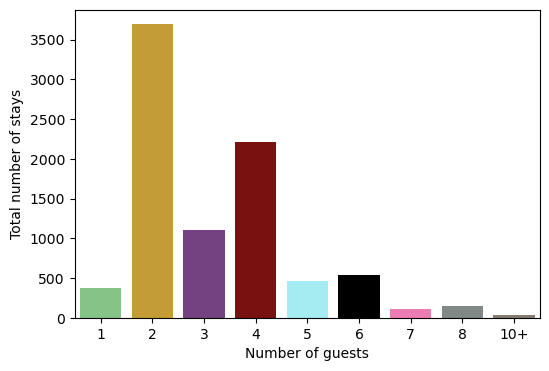

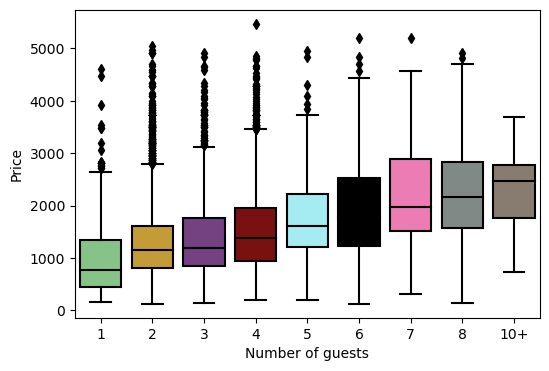

In [41]:
df_g = pd.read_csv("Data/data_final.csv", index_col=0)
df_g.dropna(subset = ["price"], inplace = True)
df_g = df_g[df_g['gæster'] > 0.5]
df_g['gæster'] = df_g['gæster'].astype(int)

I = df_g['gæster'] > 9 
df_g.loc[I, 'gæster'] = 10

g_count = df_g.groupby('gæster')[['price']].count()
g_count.reset_index(inplace = True)

f,ax = plt.subplots(figsize=(6,4))
sns.barplot(x='gæster', y='price', data=g_count, ax=ax, palette=pal)  
ax.set(xlabel="Number of guests", ylabel="Total number of stays")

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[-1] = '10+'
ax.set_xticklabels(labels)
plt.savefig('Figures/guests_bar.png', dpi=300, bbox_inches='tight')


f,ax = plt.subplots(figsize=(6,4))
sns.boxplot(x='gæster', y='price', data=df_g, ax=ax, palette=pal)
ax.set(xlabel="Number of guests", ylabel="Price")

# change the last label from 10 to 10+
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[-1] = '10+'
ax.set_xticklabels(labels);
plt.savefig('Figures/guests_box.png', dpi=300, bbox_inches='tight')


In [ ]:
f,ax = plt.subplots(figsize=(6,4))
sns.histplot(df_g['price'], bins=10, ax=ax)
ax.set(ylabel='Density', xlabel=(None))

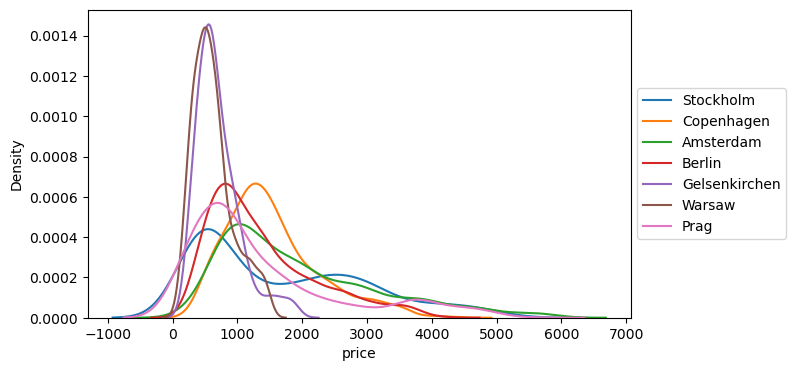

In [ ]:
# supress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_a = df_g[df_g['city'] == "Stockholm"]
# copenhagen
df_b = df_g[df_g['city'] == "Copenhagen"]
# amsterdam
df_c = df_g[df_g['city'] == "Amsterdam"]
# Berlin
df_d = df_g[df_g['city'] == "Berlin"]
# gelsenkirchen
df_e = df_g[df_g['city'] == "Gelsenkirchen"]
# zürich
df_f = df_g[df_g['city'] == "Zürich"]
# warsaw
df_w = df_g[df_g['city'] == "Warsaw"]
# Prag
df_p = df_g[df_g['city'] == "Prag"]

# plot the price distribution for each city as a distplot
fig, ax = plt.subplots(figsize=(7, 4))
sns.distplot(df_a['price'], hist = False, ax = ax, label = "Stockholm")
sns.distplot(df_b['price'], hist = False, ax = ax, label = "Copenhagen")
sns.distplot(df_c['price'], hist = False, ax = ax, label = "Amsterdam")
sns.distplot(df_d['price'], hist = False, ax = ax, label = "Berlin")
sns.distplot(df_e['price'], hist = False, ax = ax, label = "Gelsenkirchen")
#sns.distplot(df_f['price'], hist = False, ax = ax, label = "Zürich")
sns.distplot(df_w['price'], hist = False, ax = ax, label = "Warsaw")
sns.distplot(df_p['price'], hist = False, ax = ax, label = "Prag")
ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

In [ ]:
import seaborn as sns
sns.color_palette(palette='flare')

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

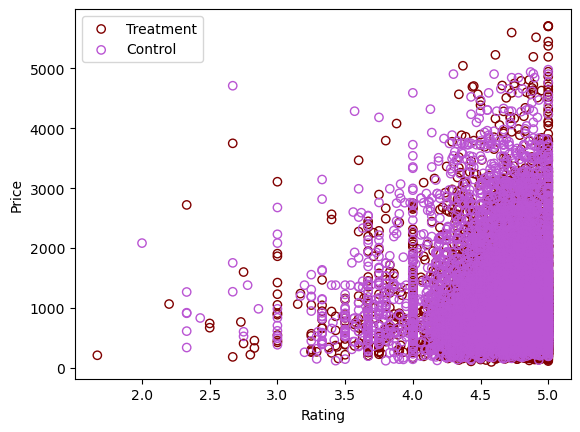

In [ ]:

# take treat == 1
df_in = df[df['rating'] > 0].copy()

df_now = df_in[df_in['treat'] == 1].copy()
df_now_c = df_in[df_in['treat'] == 0].copy()

price = df_now['price']
om = df_now['rating']

price_c = df_now_c['price']
om_c = df_now_c['rating']

fig, ax = plt.subplots()

ax.scatter(om, price, color = 'maroon', facecolors='none', label = "Treatment")
# scatter control group with hollow circles
ax.scatter( om_c, price_c, color = 'mediumorchid', facecolors='none', label = "Control")
ax.legend()
#ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

# set label and ittle in one line
ax.set(xlabel = "Rating", ylabel = "Price")
plt.savefig('figs/price_vs_rating.png', dpi = 300, bbox_inches = 'tight')

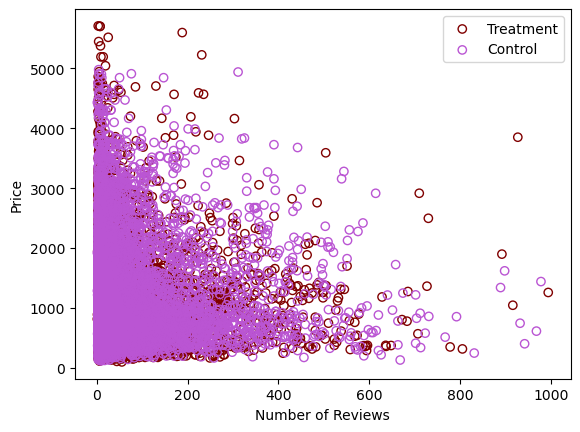

In [ ]:

# take treat == 1
df_now = df[df['treat'] == 1].copy()
df_now_c = df[df['treat'] == 0].copy()

price = df_now['price']
om = df_now['omtaler']

price_c = df_now_c['price']
om_c = df_now_c['omtaler']


fig, ax = plt.subplots()

ax.scatter(om, price, color = 'maroon', facecolors='none', label = "Treatment")
# scatter control group with hollow circles
ax.scatter(om_c, price_c, color = 'mediumorchid', facecolors='none', label = "Control")
ax.legend()
#ax.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

# set label and ittle in one line
ax.set(xlabel = 'Number of Reviews', ylabel = 'Price')
plt.savefig('figs/price_vs_review.png', dpi = 300, bbox_inches = 'tight')

In [ ]:
 df.columns[37:43]

Index(['Sights', 'Safety', 'Shopping', 'Location', 'Climate', 'Affordability'], dtype='object')

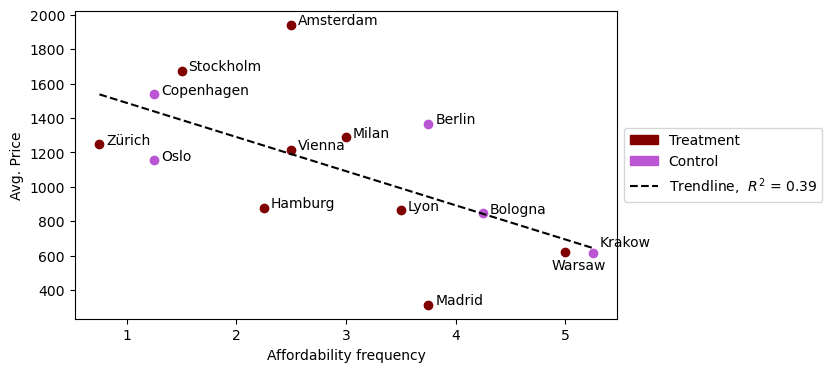

In [ ]:
#for c in df.columns[8:37]:
for c in ['Affordability']:
    df_here = df.copy()

    df_here = df_here[df_here[c] > 0]

    df_here.fillna(0, inplace=True)

    treats = list(df_here.groupby('city')['treat'].mean().astype(int))

    air_plot.plot_scatter(df_here.groupby('city')[c].mean(), df_here.groupby('city')['price'].mean(), cord_map = {"Warsaw": (-10, -12), "Krakow": (5, 5)}, trendline=True, 
        xlabel=f"{c} frequency", ylabel="Avg. Price", color = 'mediumorchid', treat_list = treats, label = True)
    
plt.savefig('figs/price_vs_affordability.png', dpi = 300, bbox_inches = 'tight')

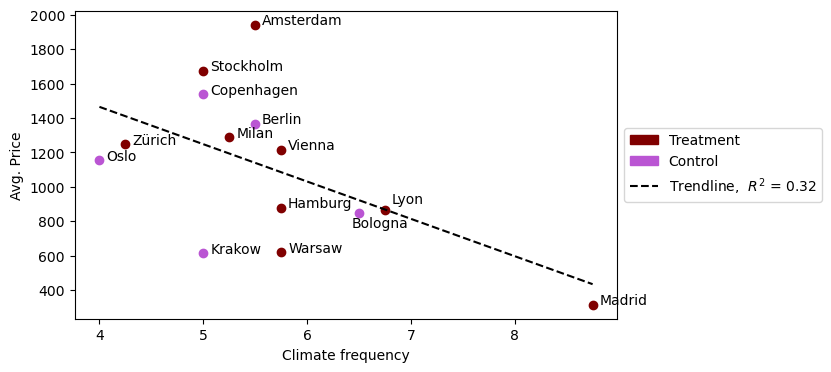

In [ ]:
#for c in df.columns[8:37]:
for c in ['Climate']:
    df_here = df.copy()

    df_here = df_here[df_here[c] > 0]

    df_here.fillna(0, inplace=True)

    treats = list(df_here.groupby('city')['treat'].mean().astype(int))

    air_plot.plot_scatter(df_here.groupby('city')[c].mean(), df_here.groupby('city')['price'].mean(), cord_map = {"Lyon": (5, 5), "Bologna": (-5, -10)}, trendline=True, 
        xlabel=f"{c} frequency", ylabel="Avg. Price", color = 'mediumorchid', treat_list = treats, label = True)
    
plt.savefig('figs/price_vs_climate.png', dpi = 300, bbox_inches = 'tight')